# Loading word embeddings

In [38]:
import io
import numpy as np

In [39]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [40]:
src_path = '/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/2ddjsabryp/vectors-en.txt'
tgt_path = '/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/2ddjsabryp/vectors-zh.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

In [47]:
# calculate distance
distance = []
srcword2distance = {}
tgtword2distance = {}
for i in range(min(len(src_embeddings), len(tgt_embeddings))):
    distance.append(np.linalg.norm(src_embeddings[i+1]-tgt_embeddings[i]))
    srcword2distance[src_id2word[i+1]] = distance[i]
    tgtword2distance[tgt_id2word[i]] = distance[i]
    print(src_id2word[i+1])
    print(tgt_id2word[i]+'\n')
distance = np.asarray(distance)

(incorporatedintheCaymanIslandswithlimitedliability)
(於開曼群島註冊成立之有限公司)

(Stockcode:974)
（股份代號：974)

re-designationOFDIRECTORS
董事調任

theBoardannouncesthefollowingre-designationofDirectorswitheffectfrom13September2017:
董事會宣佈，下列董事的調任將自2017年9月13日起生效：

(1)Mr.WuLimin,anexecutiveDirector,willbere-designatedasanon-executiveDirector;and
(1)執行董事武利民先生將調任為非執行董事；及

(2)Mr.HanWei,anon-executiveDirector,willbere-designatedasanexecutiveDirector.
(2)非執行董事韓瑋先生將調任為執行董事。

appointmentOFchiefEXECUTIVEOFFICER,chiefFINANCIALOFFICERANDchiefinnovationANDINVESTMENTOFFICER
委任行政總裁、首席財務總監及創投總監

theBoardannouncesthatwitheffectfrom13September2017:
董事會宣佈，自2017年9月13日起：

(1)Mr.LiZhongxu,anexecutiveDirector,hasbeenappointedasthechiefexecutiveofficeroftheCompany;
(1)執行董事李仲煦先生已獲委任為本公司行政總裁；

(3)Mr.FengHengyuanhasbeenappointedasthechiefinnovationandinvestmentofficeroftheCompany.
(3)馮恒源先生已獲委任為本公司創投總監。

changeOFcompositionOFTHEAUDITCOMMITTEE
審核委員會組成之變更

(1)Mr.WuLimin(“Mr.Wu”),anexecutiveDirector,willbere-designatedasanon-executi

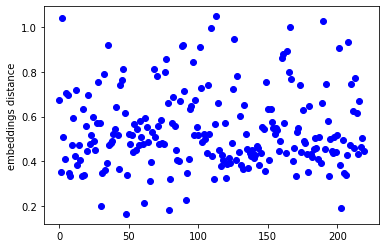

In [48]:
import matplotlib.pyplot as plt
plt.plot(distance, 'bo')
plt.ylabel('embeddings distance')
plt.show()

# Get nearest neighbors

In [8]:
# get_nn
K = min(len(src_embeddings), len(tgt_embeddings))
word2id = {v: k for k, v in src_id2word.items()}
word_emb = src_embeddings[word2id[src_id2word[4]]]
scores = (tgt_embeddings / np.linalg.norm(tgt_embeddings, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
k_best = scores.argsort()[-K:][::-1]
for i, idx in enumerate(k_best):
    print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

0.8969 - 董事會宣佈，下列董事的調任將自2017年9月13日起生效：
0.7738 - 董事會宣佈，自2017年9月13日起：
0.2935 - 與此同時，嚴先生已獲委任為本集團行政總裁，並於2017年6月27日起生效。
0.2472 - 李先生，34歲，於2017年6月10日獲委任為執行董事。
0.2344 - 有關韓先生的詳細資料請參閱本公告「董事調任」一段。
0.2005 - 董事會認為，彼的教育背景及工作經驗適合本集團未來發展。
0.1992 - 武先生，57歲，於2017年6月10日獲委任為執行董事。
0.1509 - 香港，2017年9月13日
0.1438 - (1)執行董事武利民先生將調任為非執行董事；及
0.1406 - 審核委員會組成之變更
0.1307 - 與此同時，嚴俊先生（「嚴先生」）已獲委任為本集團行政總裁，並於2017年6月27日起生效。
0.1198 - (2)執行董事武先生於調任為非執行董事後已獲委任為審核委員會成員。
0.0839 - 承董事會命
0.0692 - (1)執行董事武利民先生（「武先生」）將調任為非執行董事；及
0.0576 - (2)非執行董事韓瑋先生將調任為執行董事。
0.0438 - (2)非執行董事韓瑋先生（「韓先生」）將調任為執行董事。
0.0162 - 董事調任
-0.0010 - 委任行政總裁、首席財務總監及創投總監
-0.0062 - 韓先生將不會就出任執行董事收取任何薪酬。
-0.0337 - (1)執行董事李仲煦先生已獲委任為本公司行政總裁；
-0.0364 - 隨著本公司更換行政總裁後，本公司已重新遵守守則這方面的要求。
-0.0372 - 嚴先生之履歷如下：
-0.0560 - 武先生將不會就出任非執行董事收取任何薪酬。
-0.0577 - （股份代號：886）
-0.0702 - (1)執行董事李仲煦先生（「李先生」）已獲委任為本公司行政總裁；
-0.0801 - （股份代號：974)
-0.1002 - 李先生將不會就出任執行董事收取任何薪酬。
-0.1057 - 
-0.1171 - 彼持有美國南達科他州立大學計算機軟件碩士。
-0.1202 - 守則第A.2.1條規定，主席及行政總裁之角色應分開，且不應由同一人士擔任。
-0.1359 - (3)馮恒源先生（「馮先生」）已獲委任

In [4]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [10]:
# printing nearest neighbors in the source space
src_word = src_id2word[4]
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "theBoardannouncesthefollowingre-designationofDirectorswitheffectfrom13September2017:":
1.0000 - theBoardannouncesthefollowingre-designationofDirectorswitheffectfrom13September2017:
0.7801 - theBoardannounceswitheffectfrom13September2017:
0.7645 - theBoardannouncesthatwitheffectfrom13September2017:
0.2504 - forfurtherinformationofMr.Han,pleaserefertotheparagraphheaded“re-designationOFDIRECTORS”ofthisannouncement.
0.2302 - meanwhile,Mr.YanhasbeenappointedasthechiefexecutiveofficeroftheGroupwitheffectfrom27June2017.


In [11]:
# printing nearest neighbors in the target space
src_word = src_id2word[4]
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "theBoardannouncesthefollowingre-designationofDirectorswitheffectfrom13September2017:":
0.8969 - 董事會宣佈，下列董事的調任將自2017年9月13日起生效：
0.7738 - 董事會宣佈，自2017年9月13日起：
0.2935 - 與此同時，嚴先生已獲委任為本集團行政總裁，並於2017年6月27日起生效。
0.2472 - 李先生，34歲，於2017年6月10日獲委任為執行董事。
0.2344 - 有關韓先生的詳細資料請參閱本公告「董事調任」一段。


# Visualize multilingual embeddings

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.24


In [13]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

In [14]:
# get 5 random input words
src_words = ['university', 'love', 'history', 'tennis', 'research', 'conference']
tgt_words = ['universidad', 'amor', 'historia', u'tenis',  u'investigación', 'conferencia']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)

AssertionError: "university" not in source dictionary